<a href="https://colab.research.google.com/github/hevertonvalerio/Challenge/blob/main/E1_IntrodTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **Uma  Introdução Informal às Séries Temporais em Python**

Introdução às Séries Temporais; Aquisição e Exploração inicial em Python; Modelos Simples de Análise; Decomposição: Tendência, Sazonalidade e Resíduos.

*Mackenzie FCI Prof. Rogério de Oliveira*

<br>

<br>

___


In [ ]:
#@markdown imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import periodogram


In [ ]:
#@markdown **plot_series()** Decomposição de Séries Temporais + ACF + PACF
def plot_series(values, decomp_type='additive', max_lags=30):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type)

  ax[0].plot(decomposition.trend)
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3)

  plot_acf(values, ax=ax[0], lags = max_lags)
  plot_pacf(values, ax=ax[1], lags = max_lags)

  periods = periodogram(values)
  # print(periods)
  ax[2].bar(x=range(len(periods)), height=periods)
  plt.title('Periodogram')

  plt.tight_layout()
  plt.show()

  warnings.filterwarnings('once')

  return




# O que é uma série temporal?

> **A *Série Temporal* é uma sequência de observações registradas em intervalos de tempo regulares.**

Dependendo da frequência das observações, uma série temporal pode ser horária, diária, semanal, mensal, trimestral e anual, mas também pode haver séries temporais de segundos e minutos, como número de cliques de visitas em um site; Com segundos ou milisegundos, como para algumas séries encontradas em física; Ou mesmo décadas e períodos mais longos como encontramos em astronomia e geologia. São muitos os exemplos de dados que temos interesse em observar no tempo:

* O PIB de um país ao longo dos anos
* Produção de safras anuais agrícolas
* Preços diários de ações e commodities
* Evolução das temperatura da terra e das emissões de CO2
* Vendas e demandas de produtos de uma empresa ao longo do ano
* Aumento do número de funcionários ao longo do ano
* Redução do número de fumantes
* Aumento de casos de uma doença ou evolução do tempo de reestabelecimento dos pacientes
* etc.

e, em geral, estamos interessados em **analisar esses dados para predições e tomada de decisão.**

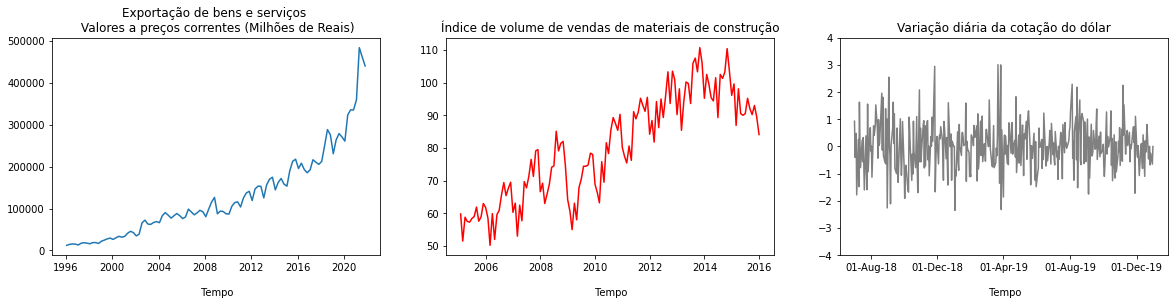

In [ ]:
#@markdown
import pandas as pd

df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações")
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar")
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Vendas")

import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='1/1/1996', end='31/12/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')
index_dates3 = pd.date_range(start='1/1/2005', end='31/12/2015', freq='M')

df1.index=index_dates1
df2.index=index_dates2
df3.index=index_dates3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,4))
ax1.plot(df1.index, df1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)')
ax1.set_xlabel('\n Tempo')

ax2.plot(df3.index, df3["volume_vendas"], c='r')
ax2.set_title('Índice de volume de vendas de materiais de construção')
ax2.set_xlabel('\n Tempo')

ax3.plot(df2.index.to_pydatetime(), df2["Var"], c='gray')
ax3.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax3.set_title('Variação diária da cotação do dólar')
ax3.set_xlabel('\n Tempo')

ax3.set_ylim([-4, 4])

# plt.tight_layout()
plt.show()


# Etapas de Análise

Séries temporais seguem o mesmo ciclo de análise de outros tipos de dados, e a diferença está nos modelos e técnicas empregadas.

<br>
<br>
<img src="http://meusite.mackenzie.br/rogerio/TIC2021S1$/T1/crispvg.png" width=1000, align="center">
<br>
<br>

1. **Definição e Entendimento do Problema.** Você pode estar buscando uma predição com um certo grau de precisão e que exige um modelo sofisticado. Mas, muitas vezes, você pode estar interessado apenas em identificar tendências dos dados.

>* *O que você exatamente busca?*

2. **Entendimento dos Dados: Análise Exploratória.** Indepentemente do problema a sua análise sempre deve iniciar por uma análise exploratória da série. De modo análogo à análise exploratória de outros tipos de dados você estará interessado em **entender os dados, identificar e entender padrões**, e **verificar a qualidade dos dados**.

>* *Que dados estão disponíveis?*

>* *Qual a qualidade desses dados?* Existem dados errados, *outliers* ou dados faltantes? Há algum tipo de *ruído* nos dados?  

> e particularmente para séries temporais:

>* *Existe uma tendência de crescimento ou decréscimo dos valores?*

>* *Existem sazonalidades?*, isto é, padrões que se repetem nos dados ao longo do tempo?

>* *Existem quebras nos valores?* Com interrupções ou saltos de valores?

> Para todas essas análises existem uma série de ferramentas, mas a principal é a **visualização dos dados** empregando diferentes formas de visualização (distribuição dos valores, evolução dos dados em diferentes intervalos de tempo etc.).

3. **Preparação dos Dados**. A preparação dos dados dependerá muito do tipo de série, do tipo de análise e do seu propósito. Pode ser necessário a *eliminação de ruído* para dados obtidos por equipamentos como uma antena, ou a *interpolação* de dados faltantes para completar uma série. O *resample* é uma operação comum que envolve transformações na escala de tempo da série original (como obter vendas mensais à partir de uma série de vendas diárias). Você pode ter que *normalizar* a série se estiver lidando com múltiplas séries de dados relacionadas e, dependendo do modelo que será adotado diversas transformações mais elaboradas com *detrending*, *transformações* dos valores por funções (por exemplo, np.log(x)) ou criação de *valores derivados* (por exemplo, obter os valores $x_{t-1}, x_{t-1}, ..., x_{t-n} $ nos tempos $t$ a partir da série $x_t$ original).

4. **Modelagem**. Os modelos também tem dependência do tipo de série e do objetivo de nossa análise. Um *modelo gráfico* pode servir para *visualizarmos* uma tendência, mas modelos preditivos exigem formas mais elaboradas e, se a preparação dos dados pode envolver tantas diferentes operações, os modelos que podemos empregar são ainda mais diversos! Aqui vamos focar principalmente em modelos previsão ou de **Forecast**  e podemos classificar esses modelos como **Modelos Supervisionados** uma vez que empregaremos um histórico de dados para as previsões. A maior parte desses modelos tem como base **modelos estatísticos**, incluindo testes estatísticos de significância. Alguns desses modelos são:

>* **AR**, autoregressivo

>* **MA**, médias móveis

>* **ARMA**, autoregressivo com médias móveis

>* **ARIMA**, autoregressivo integrado de médias móveis

>* **ARIMAX**, autoregressivo integrado de médias móveis com variável exógena

>* **SARIMAX**, autoregressivo integrado de médias móveis com variável exógena e sazonalidade

> E isso só para citar alguns, rs. Não vamos passar por todos eles. Não haveria tempo para isso aqui. Mas vale a pena entendermos melhor as séries temporais e princípios de como empregar esses modelos.

> Existem também modelos menos estatísticos, mais próximos do **Aprendizado de Máquina** e mais recentemente diversos modelos preditivos vêm empregando técnicas de aprendizado de máquina como **knn** e **árvores regressivas**, ou modelos de **redes neurais** e **redes profundas**.

5. **Avaliação dos Modelos**. Do mesmo modo que você mede o quanto um modelo de regressão linear se ajusta aos dados com o *coeficiente de determinação*, ou avalia um modelo de classificação a partir da *acuracidade* ou o *F-score*, os modelos de séries temporais também precisam ser avaliados buscando-se determinar o poder explicativo e a margem de confiança do modelo, e comparando-se diferentes modelos que competem.

6. **Deploy**. A distribuição do modelo é mais aplicável a modelos de aplicação comercial consistindo em colocá-lo dentro de uma cadeia produtiva, como empregar o modelo de previsão vendas para regular os estoques.

Sem muito destaque nesse ciclo de vida, a aplicação recente desses modelos bastante elaborados e complexos nos negócios, também exigem um esforço de torná-los mais compreensíveis a um público maior, e menos especializado, permitindo a adoção dos modelos. Nessa linha são comuns, dentre outras, práticas de **storytelling** dos dados.    


# Abordando um Problema de Séries Temporais

Vamos apresentar uma visão geral de como podemos lidar com a análise e previsão de Séries Temporais embora, aqui, vamos tratar apenas do Passo 1, e as outras etapas você poderá ver mais adiante ou buscar referencias complementares.




## **Passo 1** Explorando a Série Temporal

Explore seus dados. As Séries Temporais tem muitas características que as diferem de outros tipos de dados. Aqui vamos explorar basicamente este primeiro passo que vamos buscar detalhar mais adiante. Mas é importante que você tenha uma visão geral do tratamento das Séries Temporais.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide1.PNG" width=800, align="center">

<br>

<small> **Passo 1. Explorando Séries Temporais.**


## **Passo 2** Selecionando Modelos Candidatos e Ferramentas

Depois de conhecer a sua Série de dados você pode passar a buscar os modelos que você julga mais adequados para tratar os dados. Em geral você vai aplicar mais vários modelos candidatos.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide2.PNG" width=800, align="center">

<br>

<small> **Passo 2. Selecione os Modelos e Ferramentas que irá usar.**

Também é a hora de selecionar as ferramentas que pretende utilizar.

## **Passo 3** Construindo e Selecionando os Melhores Modelos

Você deve partir de modelos mais simples e ir refinando os modelos, empregando modelos mais elaborados. Os modelos base que mostraremos aqui, por exemplo, já são um primeiro modelo. Em seguida, por exemplo, você pode partir de um modelo AR ou MA, antes de seguir para um modelo ARMA ou ARIMA e assim por diante, mas  você pode escolher muitos outros tipos de modelos.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide3.PNG" width=800, align="center">

<br>

<small> **Passo 3. Comece de Modelos Mais Simples.**

Nem sempre um modelo mais complexo e elaborado é um melhor modelo para os seus dados. Para verificar se um modelo é melhor que outro são empregadas métricas como o **AIC**, **MSE**, gráficos como o **qqplot**, podendo ainda ser separados **conjuntos de treinamento e teste** das séries temporais. Mas não abordaremos isso nesta introdução.


<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide5.PNG" width=800, align="center">

<br>

<small> **Passo 3b. A Construção Completa de um único modelo pode exigir uma série de passos. Acima o esquemático de construção de um modelo ARIMA.**


A construção completa de um único modelo pode exigir uma série de passos e que incluem para o um mesmo modelo a **escolha de melhores parâmetros** do modelo, como no esquemático acima, os parâmetros $p, d, q$ do modelo ARIMA.  

Conjuntos de dados mais complexos ainda podem envolver mais de uma Série de Dados relacionadas.


<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide4.PNG" width=800, align="center">

<br>

<small> **Passo 3b. A Construção Completa de um único modelo pode exigir uma série de passos. Acima o esquemático de construção de um modelo ARIMA.**

Você pode, por exemplo, pensar na Série de aluguéis de Bicicletas dependendo da Série Climática (temperaturas mais altas no verão levando ao uso maior dos passeios de bicicleta), a Série de preços do BitCoin dependendo da Série de valores do Dólar ou ainda a evolução dos casos de Covid dependendo da evolução da vacinação.

## **Passo 4** Apresentação dos Resultados

Não menos importante, ao final, é importante a apresentação dos resultados que deve ter por objetivo convencer aos interessados, nem sempre especialistas ou familiarizados com as técnicas empregadas, da validade do seu modelo para que ele seja de fato adotado para a tomada de decisões.

<img src="https://images.squarespace-cdn.com/content/v1/52f42657e4b0b3416ff6b831/1631484138813-SRW9GMR97DM55AX31LKN/Global_financial_crisis__10_years_on.png?format=500w" width=500, align="center">

<br>

<small> **Passo 4. Storytelling GOOD.**

<img src="https://images.squarespace-cdn.com/content/v1/52f42657e4b0b3416ff6b831/1631541491268-C12DFA6RXBP5Y6XQDYK9/How_Much_Data_Is_Collected_Every_Minute_Of_The_Day.jpg?format=500w" width=400, align="center">

<br>

<small> **Passo 4. Storytelling BAD. Por que?**


# **Vamos aqui, explorar apenas o Passo 1**

# Exploração de Séries Temporais

A exploração das séries depende bastante do dado em mãos, mas o principal recurso parece consistir na visualização das séries de dados para identificar certos padrões.

Duas ferramentas muito úteis são o plot dos valores ao longo do tempo e a distribuição desses valores (histograma). Vamos ver 3 séries de dados:


* A **produção anual total de arroz** (milhões de toneladas métricas) para a Guiné de **1970 a 2011**. Com uma tendência de crescimento anual.

* As **médias anuais** das áreas diárias **de manchas solares** (em unidades de milionésimos de hemisfério) de maio de **1874 a 1976**. Evidenciando o ciclo solar de 11 anos.  

* Os dados clássicos de **totais mensais de passageiros de 1949 a 1960** da companhia aérea Box & Jenkins. Evidenciando o crescimento de passageiros aéreos e a o maior número nos finais de ano.

Mais informações e para acesso aos arquivos originais, você pode acessar https://github.com/vincentarelbundock/Rdatasets.

In [ ]:
only_trend = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/guinearice.csv', parse_dates=['date'], index_col='date')
only_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/sunspotarea.csv', parse_dates=['date'], index_col='date')
trend_and_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')

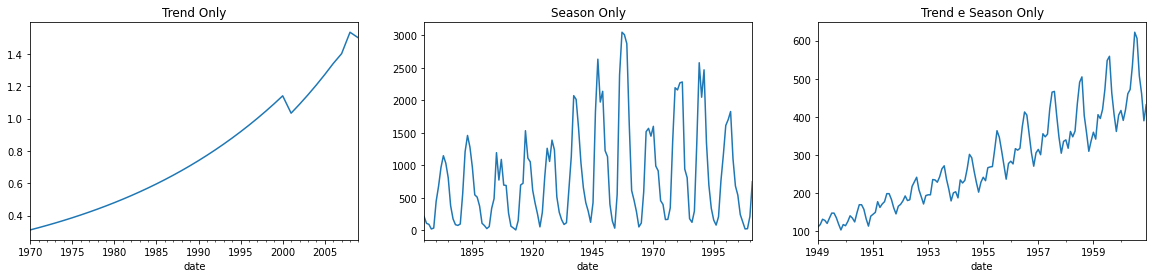

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

only_trend.plot(title='Trend Only', legend=False, ax=ax[0])
only_season.plot(title='Season Only', legend=False, ax=ax[1])
trend_and_season.plot(title='Trend e Season Only', legend=False, ax=ax[2])

plt.show()

## Distribuição dos valores

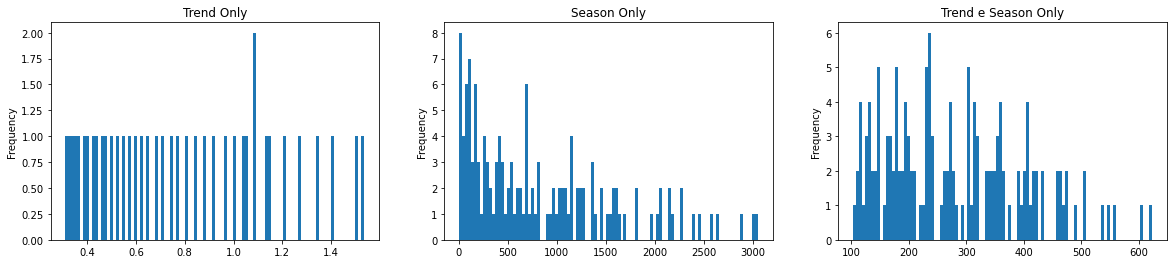

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

only_trend.plot.hist(title='Trend Only', legend=False, ax=ax[0], bins=100)
only_season.plot.hist(title='Season Only', legend=False, ax=ax[1], bins=100)
trend_and_season.plot.hist(title='Trend e Season Only', legend=False, ax=ax[2], bins=100)

plt.show()

## Modelo Ingênuo de Médias

Talvez, sem conhecer nada de uma série temporal, uma primeira estimativa poderia ser o seu valor médio ao longo do tempo. Esse valor é útil, pois um modelo *ingênuo* pode servir de base para modelos mais elaborados.

Na mesma linha podemos ainda refinar essa estimativa avaliando os valores médios para diferentes períodos da série e, se você pensar que em muitos casos valores mais recentes podem ter uma influência maior na previsão de novos valores, faz sentido observarmos a média de valores mais recentes.

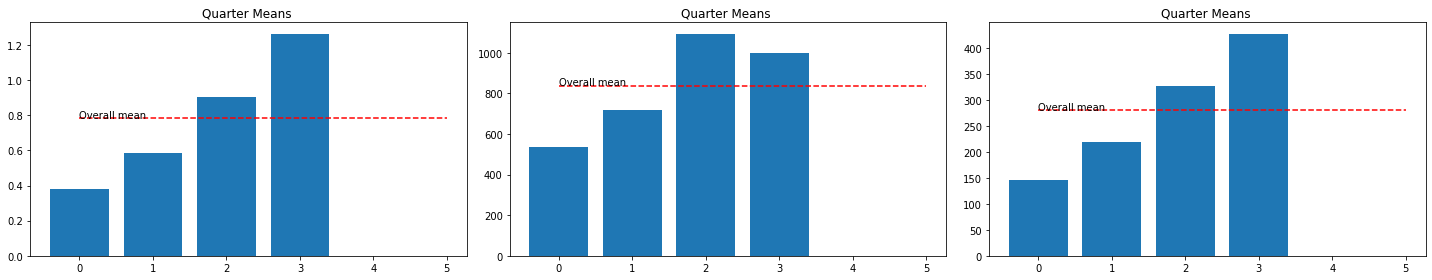

In [ ]:
def plot_means(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  ax.bar(range(4), np.array([df.reset_index().iloc[ ix[0]:ix[1] ].value.mean(),
                              df.reset_index().iloc[ ix[1]:ix[2] ].value.mean(),
                              df.reset_index().iloc[ ix[2]:ix[3] ].value.mean(),
                              df.reset_index().iloc[ ix[3]:ix[4] ].value.mean()]))
  ax.hlines(df.value.mean(),0,5,color='r',linestyle='--')
  ax.text(0, df.value.mean(), 'Overall mean')
  ax.set_title('Quarter Means ')

  return

fig, ax = plt.subplots(1,3, figsize=(20,4))

plot_means(only_trend, ax=ax[0],t='Trend Only')
plot_means(only_season, ax=ax[1],t='Season Only')
plot_means(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()

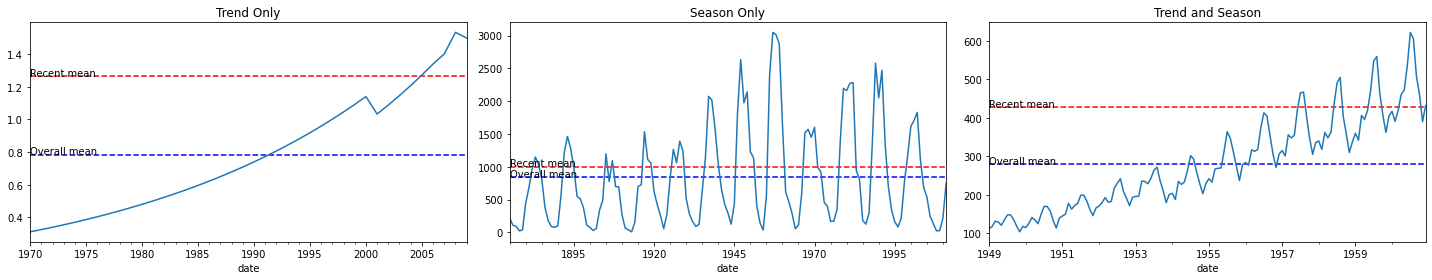

In [ ]:
def plot_means2(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  df.plot(title=t, legend=False, ax=ax)
  ax.hlines(df.reset_index().iloc[ ix[3]:ix[4] ].value.mean(), df.index[0], df.index[-1],color='r',linestyle='--')
  ax.text(df.index[0], df.reset_index().iloc[ ix[3]:ix[4] ].value.mean(), 'Recent mean')

  ax.hlines(df.reset_index().value.mean(), df.index[0], df.index[-1],color='b',linestyle='--')
  ax.text(df.index[0], df.reset_index().value.mean(), 'Overall mean')

  return

fig, ax = plt.subplots(1,3, figsize=(20,4))

plot_means2(only_trend, ax=ax[0],t='Trend Only')
plot_means2(only_season, ax=ax[1],t='Season Only')
plot_means2(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()

A mesma ideia pode, por exemplo, ser aplicada a modelos de regressão aplicados a intervalos. Mas não desenvolveremos esse modelo aqui.

## Modelo ingênuo de Regressão

Alguns tipos de séries, como séries onde predomina a tendência, um modelo de regressão pode ser útil. Mas note que o modelo de regressão não é um modelo temporal.

> **O modelo de regressão não é exatamente um modelo temporal! Note que você não pode escrever um modelo $f(t) = a_0 + a_1 t$ onde $t$ é o tempo da forma que empregamos nas séries anteriores YYYY-MM-DD ou algo assim.**

Podemos entretanto criar criar uma coluna de *time-steps*, ou períodos, que podemos então empregar diretamente.

$$ \hat y = a_0 + a_1 \text{time_steps} $$

# Caso: **Estimando a emissão de CO2 no Mundo**

Vamos empregar modelos de regressão simples para estimar as emissões de CO2 a partir da série histórica de emissões de gases para os próximos 36 meses.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns='Date',inplace=True)
df.head()

,CO2
Date,
1959-01-01,315.42
1959-02-01,316.31
1959-03-01,316.50
1959-04-01,317.56
1959-05-01,318.13


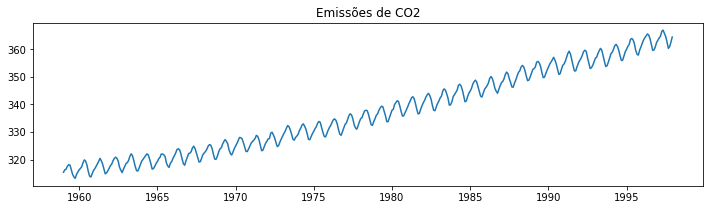

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(df.CO2)
plt.title('Emissões de CO2')
plt.show()

Por simplicidade vamos chamar nossa coluna de time.

In [ ]:
df['time'] = np.arange(len(df))
df.head()

,CO2,time
Date,,
1959-01-01,315.42,0
1959-02-01,316.31,1
1959-03-01,316.50,2
1959-04-01,317.56,3
1959-05-01,318.13,4


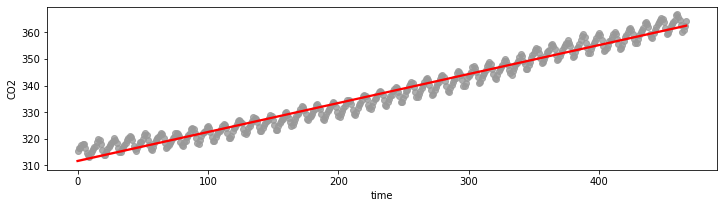

In [ ]:
plt.figure(figsize=(12,3))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='red'))

plt.show()

### Modelo de Regressão

In [ ]:
model = sm.ols(formula='CO2 ~ time', data=df)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:25:24   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    311.6118      0.242   1289.503      0.0

### Predict 36 meses a frente...

In [ ]:
new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 36)

new_times['prediction'] = result.predict(new_times)
new_times.head()

,time,prediction
0,468,362.604190
1,469,362.713148
2,470,362.822106
3,471,362.931064
4,472,363.040022


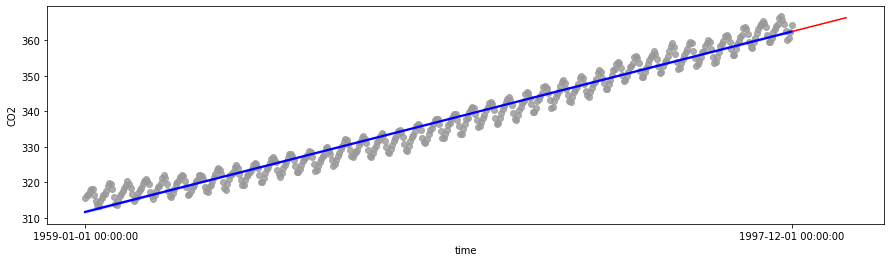

In [ ]:
plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='blue'))

sns.lineplot(x='time', y='prediction', data=new_times, color='red')

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df.index[0], df.index[-1] ])
plt.show()

E esse modelo, certamente é uma estimativa bastante razoável do aumento de emissões para os próximos 3 anos.

# Decomposição de Séries Temporais

Uma **tendência** é observada quando há uma inclinação crescente ou decrescente observada na série temporal. Já a **sazonalidade** é observada quando há um padrão repetido distinto observado entre intervalos regulares devido a fatores sazonais. Pode ser por causa do mês do ano, do dia do mês, dos dias da semana ou mesmo da hora do dia. Mas, como vimos antes, não é obrigatório que todas as séries temporais tenham tendência e/ou sazonalidade. Uma série temporal pode não ter uma tendência distinta, mas ter uma sazonalidade e o contrário também pode acontecer. Há ainda uma componente de **Resíduos**, um movimento dos dados que não pode ser explicado nem pela tendência e nem pela sazonalidade.

## Séries temporais aditivas e multiplicativas

Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação da série pode ser expressa como uma soma ou um produto dos componentes:

* Série temporal aditiva:

$$Valor = Tendência +  Sazonalidade + Resíduos$$

* Séries Temporais Multiplicativas:

$$ Valor = Tendência \times Sazonalidade \times Resíduos$$

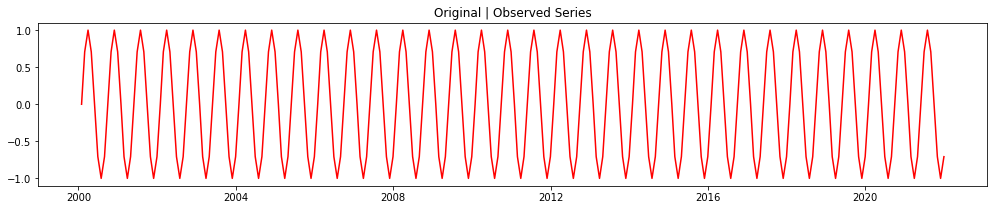

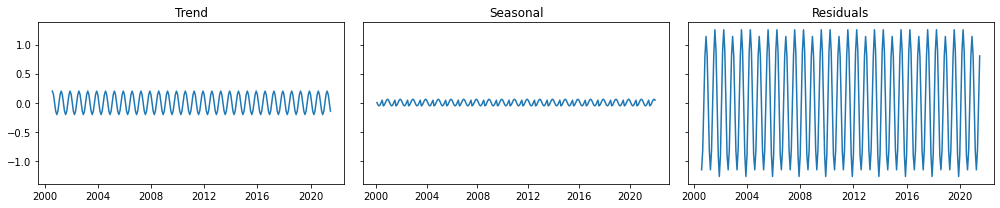

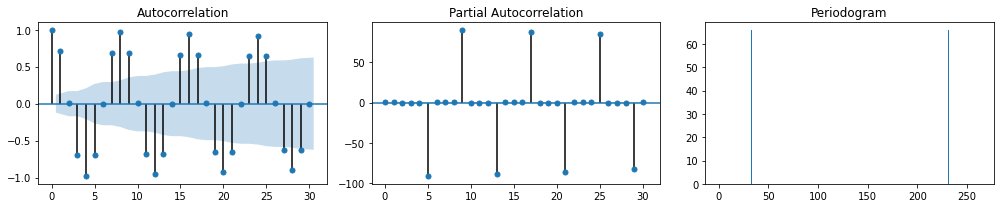

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.sin( np.arange(0,len(index_dates),1) * np.pi/4 )
df = pd.DataFrame()
df.index = index_dates
df['values'] = values

plot_series(df['values'])

In [ ]:
import ipywidgets as widgets

def f(P=20):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )
  df = pd.DataFrame()
  df.index = index_dates
  df['values'] = values

  plot_series(df['values'])

w = widgets.interactive(f, P=(1, 100, 1))
display(w)



interactive(children=(IntSlider(value=20, description='P', min=1), Output()), _dom_classes=('widget-interact',…

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )
  values = values + noise*np.random.sample(len(index_dates))
  df = pd.DataFrame()
  df.index = index_dates
  df['values'] = values

  plot_series(df['values'])

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01))
display(w)

interactive(children=(IntSlider(value=20, description='P', min=1), FloatSlider(value=0.5, description='noise',…

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=2):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )
  values = values*noise*np.random.sample(len(index_dates))
  values = values*trend*np.linspace(0,1,len(index_dates)) + 1
  df = pd.DataFrame()
  df.index = index_dates
  df['values'] = values

  plot_series(df['values'])

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,40,0.1))
display(w)

interactive(children=(IntSlider(value=20, description='P', min=1), FloatSlider(value=0.5, description='noise',…

# Séries não Estacionárias

Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo.

> **Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo. Por exemplo, a média e a variância, e assim também o desvio padrão, mudam significativamente ao longo do tempo.**

Isso é um grande um problema para as predições e uma forma de contornarmos isso é fazendo transformações das séries temporais tornando-as estacionárias. São comuns transformações do tipo $log(x_t)$ ou de potências $x_t^2$, mas antes disso vamos ver um teste para verificar se a uma série é, de fato, signficativamente estacionária ou não.



In [ ]:
trend_and_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')

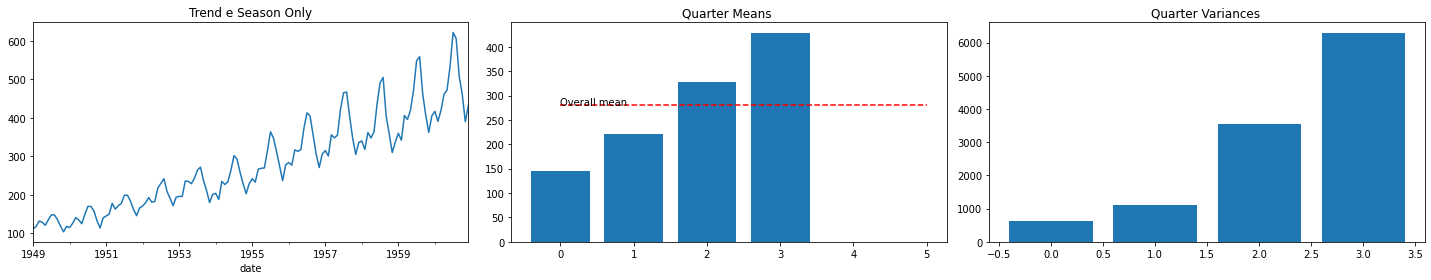

In [ ]:
def plot_var(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  ax.bar(range(4), np.array([df.reset_index().iloc[ ix[0]:ix[1] ].value.var(),
                              df.reset_index().iloc[ ix[1]:ix[2] ].value.var(),
                              df.reset_index().iloc[ ix[2]:ix[3] ].value.var(),
                              df.reset_index().iloc[ ix[3]:ix[4] ].value.var()]))
  ax.set_title('Quarter Variances ')

  return

fig, ax = plt.subplots(1,3, figsize=(20,4))

trend_and_season.plot(title='Trend e Season Only', legend=False, ax=ax[0])
plot_means(trend_and_season, ax=ax[1],t='Trend and Season')
plot_var(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()


plt.show()

A Série de Passageiros Não é claramente estacionária e podemos ver a variação tanto da média como da variância ao longo do tempo.

# ADF Augmented Dickey-Fuller

O teste **ADF Augmented Dickey-Fuller** é um teste para verificar se uma série temporal é ou não estacionária de modo significativo. É um dos testes mais simples e você pode buscar outros testes mais elaborados se precisar aplicá-los de fato. Na prática, todos esses testes são limitados a poucas características de não estacionariadade, e pode ser necessário aplicar mais de um teste e, mesmo, uma inspeção visual pode ser às vezes mais importante e reveladora.

Aqui a hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.

Assim, de modo prático,

$p-valor \gt 0,05$ : Falha ao rejeitar a hipótese nula ($H0$), **a série não é estacionária**.

$p-value \le 0.05$ : Rejeitar a hipótese nula ($H0$), **a série é estacionária**.

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=4):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 2
  values = values * noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1
  df = pd.DataFrame()
  df.index = index_dates
  df['values'] = values

  plot_series(df['values'])

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

interactive(children=(IntSlider(value=20, description='P', min=1), FloatSlider(value=0.5, description='noise',…

,values
2000-01-31,1.000000
2000-02-29,1.016710
2000-03-31,1.042215
2000-04-30,1.039036
2000-05-31,1.105313
...,...
2021-08-31,4.443974
2021-09-30,2.178884
2021-10-31,1.386017
2021-11-30,3.820244


In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.211257
p-value: 0.202185
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Ou, se preferir uma versão mais simplificada,

In [ ]:
def isSeriesStationary(series):
  pValue = adfuller(series)[1]
  if pValue > 0.05:
      return False
  else:
      return True

isSeriesStationary(df['values'])

False

# Tornando uma Série Estacionária

Várias transformações podem ser aplicadas para tornar uma série estacionária. A ideia é aplicar a transformação, empregar a série estacionária para a criar um modelo de predição e, feita a predição, aplicar a inversa da transformação para obter o resultado da série original.

Vários tipos de transformação podem ser aplicadas o que vai depender da série de dados e não há uma regra para isso. Mas são comuns a aplicação de $log(x_t)$, funções de potência como $x_t^{exp}$, ou ainda funções de diferença, como abaixo, que podem remover tendências e sazonalidades dos dados.





<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/TimeSeriesFlows.png" width=800, align="center">

<br>

<small> **No emprego de vários modelos, estatísticos ou não, é comum trasformarmos a série em estacionária para aplicação dos modelos e previsões.**

Veja, por exemplo, como a aplicação do `log()` *estabiliza* o desvio padrão de variância da série original.

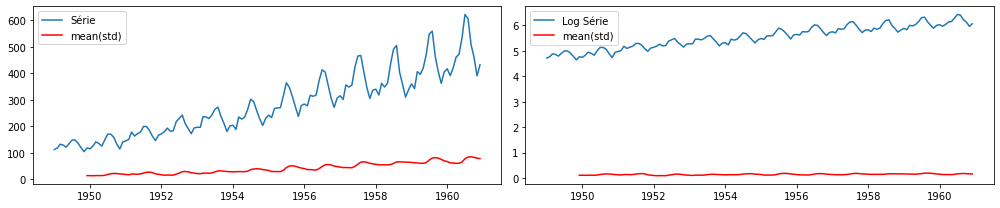

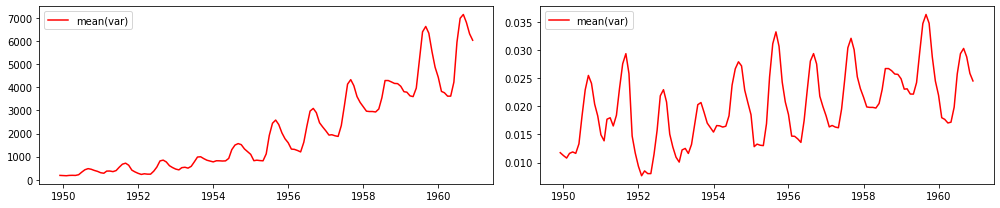

In [ ]:
trend_and_season_log = np.log(trend_and_season)

plt.subplot(1,2,1)
plt.plot(trend_and_season, label='Série')
plt.plot(trend_and_season.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log, label='Log Série')
plt.plot(trend_and_season_log.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(1,2,1)
plt.plot(trend_and_season.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.tight_layout()
plt.show()

## Transformação de diferença
A diferenciação é um método de transformar um conjunto de dados de série temporal que pode tanto remover tendências e sazonalidades dos dados.

A ideia transformarmos a série de dados em uma série de diferenças em um dado intervalo para obtermos a série estacionária $y_e$.

$$ y_e(t) = y(t) - y(t- \text{intervalo}) $$

Vamos criar uma nova série $y_e$ baseada na série original $y$ considerando o intervalo $1$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=0.2):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 10
  values = values + noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1

  values = values

  df = pd.DataFrame()
  df.index = index_dates
  df['values'] = values

  df = df.diff().dropna()
  plot_series(df['values'])

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

interactive(children=(IntSlider(value=20, description='P', min=1), FloatSlider(value=0.5, description='noise',…

,values
2000-02-29,0.008531
2000-03-31,0.008862
2000-04-30,0.009729
2000-05-31,0.008346
2000-06-30,0.009903
...,...
2021-08-31,-0.039676
2021-09-30,-0.099821
2021-10-31,0.007422
2021-11-30,-0.077222


In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.481938
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Agora os dados se mostram, tanto graficamente como pelo teste ADF, estacionários.

# Caso: **Estimando a emissão de CO2 no Mundo**

Vamos empregar o teste para verificar a não estacionariedade na série de emissões de CO2.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns='Date',inplace=True)
df.head()

,CO2
Date,
1959-01-01,315.42
1959-02-01,316.31
1959-03-01,316.50
1959-04-01,317.56
1959-05-01,318.13


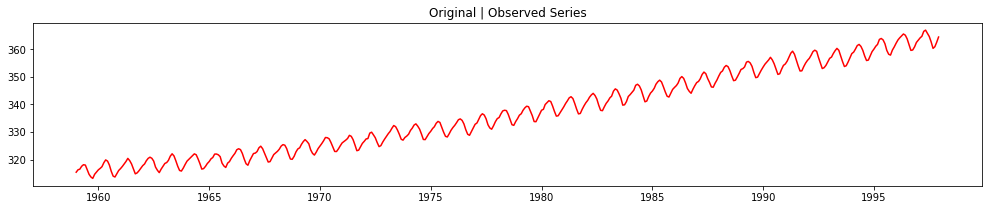

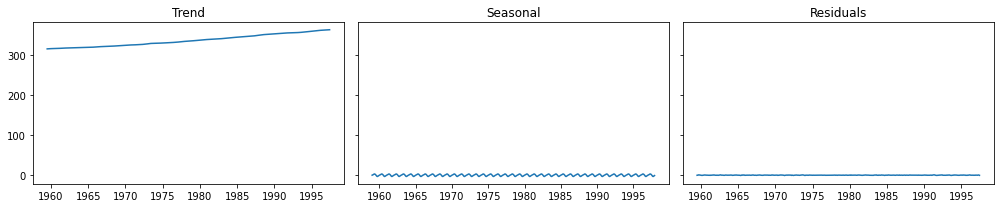

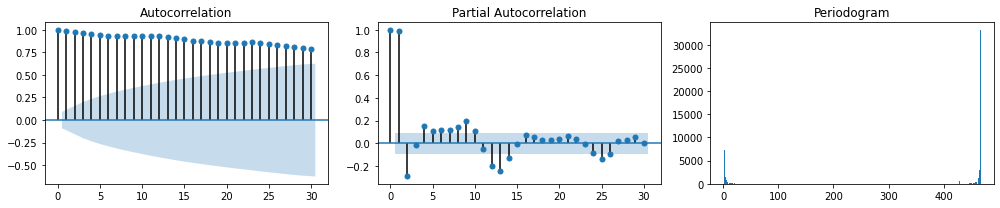

In [ ]:
plot_series(df['CO2'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.321850
p-value: 0.998969
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [ ]:
isSeriesStationary(df['CO2'])

False

# Tornando a Série Estacionária

Vamos criar uma nova série $y_e$ baseada na série original $y$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$



In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2'].diff().dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.138087
p-value: 0.000012
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [ ]:
isSeriesStationary(df['CO2'].diff().dropna())

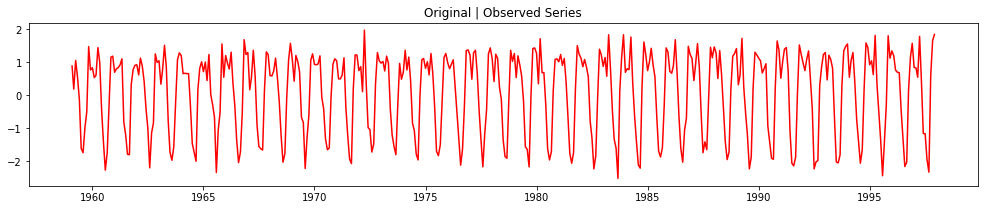

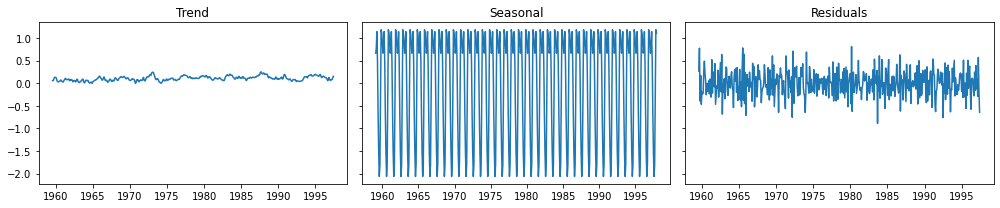

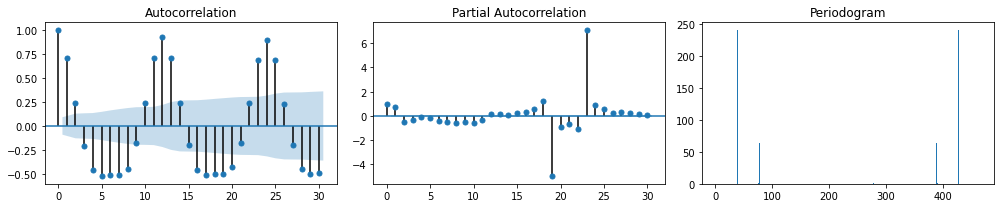

In [ ]:
plot_series(df['CO2'].diff().dropna())

# Random Walk: Valores Aleatórios

Um caso especial de Série Temporal que você pode encontrar é quando a Série não apresenta de fato uma dependendência temporal mas é constituída de valores aleatórios. Embora apareçam diferentes valores no tempo eles não tem correlação com valores anteriores ou mesmo com o período. Séries como essa apresentam um gráfico de Auto Correlação e Auto Correlação Parcial muito característicos e para esse tipo de Série modelos estatísticos sofisticados (do AR, MA, ARIMA ou mais) e mesmo modelos de aprendizado de máquina podem fazer pouco, sendo preferível o uso de modelos bastante simples de médias.

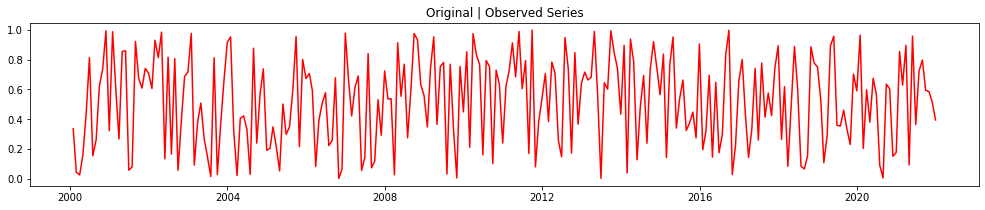

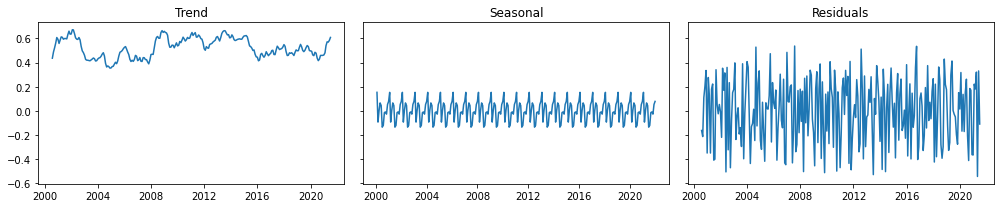

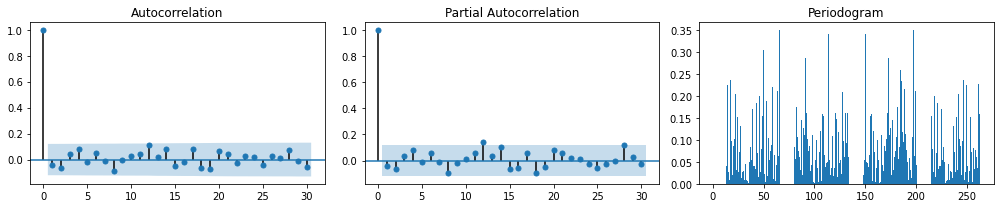

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.random.sample( len(index_dates) )
random_walk = pd.DataFrame()
random_walk.index = index_dates
random_walk['values'] = values

plot_series(random_walk['values'])